CHANDRAGIRI NIKHITHA

TASK 1: STOCK PREDICTION

In [25]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score

In [26]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

C:\Users\cnikh\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
x,y=mnist["data"],mnist["target"]

In [28]:
x.shape

(70000, 784)

In [29]:
y.shape   

(70000,)

<function matplotlib.pyplot.show(close=None, block=None)>

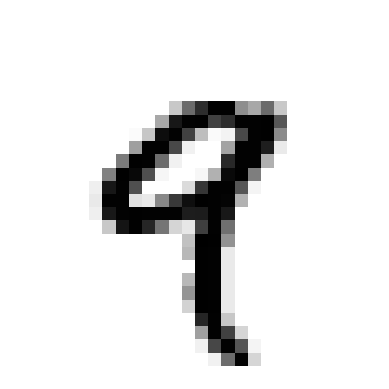

In [30]:
digit=x.values[4]
image=digit.reshape(28,28)
plt.imshow(image, cmap=mlp.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show

In [31]:
y[4]

'9'

In [32]:
y.astype(np.uint8)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [33]:
x_train,x_test,y_train,y_test=x[:55500].values,x[55500:].values,y[:55500],y[55500:]

In [34]:
y_train_5=(y_train=='5').values
y_test_5=(y_test=='5').values
print(y_train_5[0])

True


In [35]:
clf=SGDClassifier(random_state=42)
clf.fit(x_train,y_train_5)
digit=[5]
p=clf.predict(x_test)
count=0
i=0
for x in x_test:
  if(clf.predict(x.reshape(1,-1))==y_test_5[i]):
    count=count+1
    i=i+1
print(count)

7106


In [36]:
skfolds=StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf=clone(clf)
  x_train_folds=x_train[train_index]
  y_train_folds=y_train_5[train_index]
  x_test_fold=x_train[test_index]
  y_test_fold=y_train_5[test_index]
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred))

0.967027027027027
0.9608648648648649
0.9582702702702702


In [37]:
cross_val_score(clf,x_train,y_train_5,cv=5,scoring="accuracy")

array([0.96612613, 0.91351351, 0.96666667, 0.96333333, 0.96504505])

In [38]:
y_train_pred=cross_val_predict(clf,x_train,y_train_5,cv=3)

In [39]:
confusion_matrix(y_train_5,y_train_pred)

array([[49428,  1060],
       [ 1046,  3966]], dtype=int64)

In [40]:
print("PRECISION :")
print(precision_score(y_train_5,y_train_pred))
print("RECALL :")
print(recall_score(y_train_5,y_train_pred))
print("F1 SCORE :")
f1_score(y_train_5,y_train_pred)

PRECISION :
0.7890966971746916
RECALL :
0.7913008778930567
F1 SCORE :


0.7901972504482965